In [65]:
import pandas  as pd

In [66]:
dataset=pd.read_csv("diabetes.csv")

In [67]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [68]:
from sklearn.model_selection import train_test_split

In [70]:
x=dataset.drop(['Outcome'],axis=1)

In [71]:
y=dataset["Outcome"]

In [76]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x_sm,y_sm=smote.fit_sample(x,y)

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2,random_state=0)

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
model=LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0)

In [81]:
model.fit(x_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
model.score(x_test,y_test)

0.785

In [83]:
#import pickle

In [84]:
#with open('model','wb') as f:
  #  pickle.dump(model,f)

In [85]:
y_pred=model.predict(x_test)

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
cm=confusion_matrix(y_pred,y_test)

In [88]:
import seaborn as sn

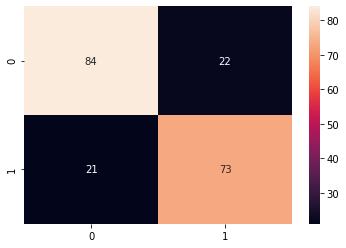

In [89]:
sn.heatmap(cm,annot=True,fmt='d')

In [90]:
import pickle


In [92]:
with open('model_pickle','wb') as f:
    pickle.dump(model,f)